In [6]:
# import stuff
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os

import scipy
from scipy import signal
import h5py, time
from iminuit import Minuit, describe
from pprint import pprint # we use this to pretty print some stuff later
import glob
import pandas as pd
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile
from discharge_tools import *
from AnaUtil import *
from bisect import bisect_left
from tqdm import tqdm
import datetime as dt
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [7]:
Year = "2020"
Month = "01"
Day = "21"
BeadNumber =1
folder_basic = r"/data/new_trap/"+ Year + Month + Day + "/Bead"+str(BeadNumber)
folder_processed = r"/data/new_trap_processed/harmonics_processed/"+ Year + Month + Day + "/Bead"+str(BeadNumber)


In [3]:
measurements = [362,362,362]
frequency_list= [[7]*3]

In [76]:
counter = 0
for element in np.unique(measurements):
    counter +=1
    processor_new_trap(folder_basic,[element]*measurements.count(element),frequency_list[counter-1],max_file=1000,save_file=True)

The used distance is 362 and the used frequency is 7


 10%|█         | 5/50 [00:00<00:00, 47.50it/s]

50  files in folder
50  files loaded


100%|██████████| 50/50 [00:01<00:00, 48.04it/s]


Folder exists or no permission
File could not be saved, probably exists.
The used distance is 362 and the used frequency is 7


 10%|█         | 5/50 [00:00<00:01, 41.46it/s]

50  files in folder
50  files loaded


100%|██████████| 50/50 [00:01<00:00, 44.34it/s]


Folder exists or no permission
File could not be saved, probably exists.
The used distance is 362 and the used frequency is 7


 10%|█         | 5/50 [00:00<00:00, 46.43it/s]

50  files in folder
50  files loaded


100%|██████████| 50/50 [00:01<00:00, 45.05it/s]


Folder exists or no permission
/data/new_trap_processed/harmonics_processed/20200121/Bead1/Shaking362/harmonics_processed_basic_Shaking362_2.pkl


In [4]:
df_list = file_loader_processed(folder_processed,measurements)

/data/new_trap_processed/harmonics_processed/20200121/Bead1/Shaking362/harmonics_processed_basic_Shaking362_0.pkl
/data/new_trap_processed/harmonics_processed/20200121/Bead1/Shaking362/harmonics_processed_basic_Shaking362_1.pkl
/data/new_trap_processed/harmonics_processed/20200121/Bead1/Shaking362/harmonics_processed_basic_Shaking362_2.pkl


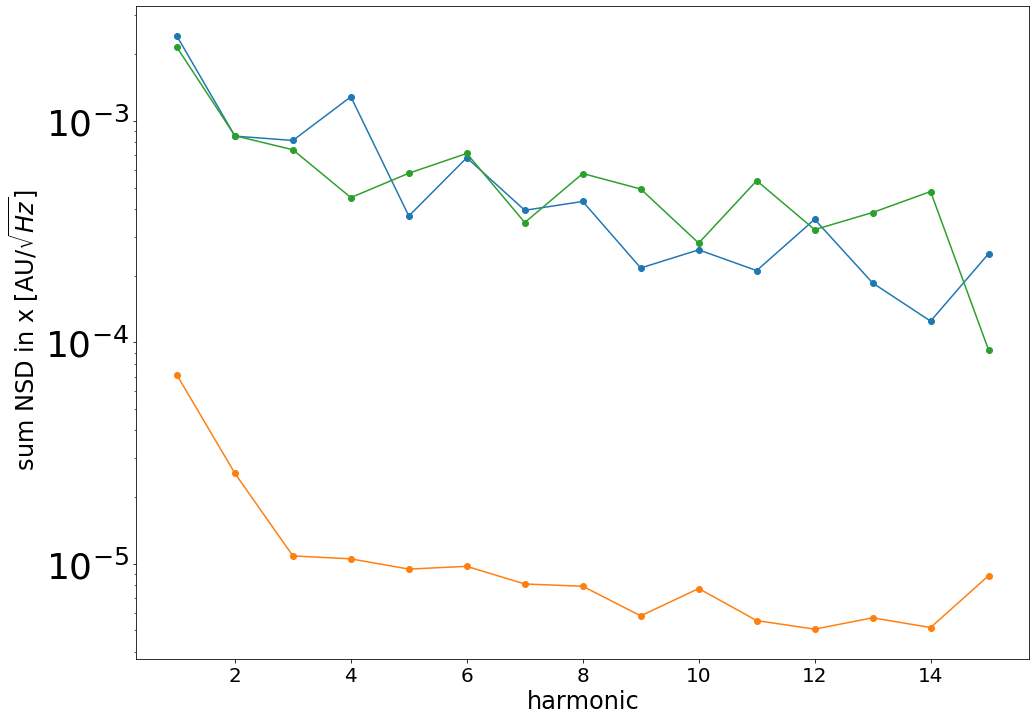

[array([0.12085014, 0.04271845, 0.04083331, 0.06433336, 0.01861488,
        0.03412212, 0.01975097, 0.02164818, 0.01083822, 0.01309071,
        0.01054928, 0.01797859, 0.00927634, 0.00623751, 0.01256511]),
 array([0.00355692, 0.00128069, 0.00054257, 0.00052609, 0.000473  ,
        0.00048676, 0.0004052 , 0.00039571, 0.00029076, 0.0003864 ,
        0.00027691, 0.00025328, 0.00028494, 0.00025757, 0.00044174]),
 array([0.10755997, 0.04288946, 0.03707099, 0.02254768, 0.02905001,
        0.03567537, 0.01738527, 0.02895302, 0.02463635, 0.01403908,
        0.02687638, 0.01615096, 0.01929845, 0.02400944, 0.00461921])]

In [10]:
df_sublist = df_list


#df_sublist = df_list[3:7]
#df_sublist.append(df_list[6][0:40])
#df_sublist.append(df_list[6][40:100])
norm_factor = 1
axis = "x"
#if(axis=="x"):norm_factor=norm_x
#if(axis=="z"):norm_factor=norm_z    
distance = 362
output_file= "Results/No_Wall_20200128/%sforce_shield_influence_%d.png" %(axis,distance)
save_file = True
plot_basic_harmonic_sum(df_sublist,axis=axis,norm_factor=norm_factor,no_harmonics=15,label="Z position in um",var_of_interest="attractor_position_z",output_file=output_file,legend=False,save_file=save_file)


In [11]:
measurements2 = [361]*10
df_list2 = file_loader_processed(folder_processed,measurements2)

/data/new_trap_processed/harmonics_processed/20200121/Bead1/Shaking361/harmonics_processed_basic_Shaking361_0.pkl
/data/new_trap_processed/harmonics_processed/20200121/Bead1/Shaking361/harmonics_processed_basic_Shaking361_1.pkl
/data/new_trap_processed/harmonics_processed/20200121/Bead1/Shaking361/harmonics_processed_basic_Shaking361_2.pkl
/data/new_trap_processed/harmonics_processed/20200121/Bead1/Shaking361/harmonics_processed_basic_Shaking361_3.pkl
/data/new_trap_processed/harmonics_processed/20200121/Bead1/Shaking361/harmonics_processed_basic_Shaking361_4.pkl
/data/new_trap_processed/harmonics_processed/20200121/Bead1/Shaking361/harmonics_processed_basic_Shaking361_5.pkl
/data/new_trap_processed/harmonics_processed/20200121/Bead1/Shaking361/harmonics_processed_basic_Shaking361_6.pkl
/data/new_trap_processed/harmonics_processed/20200121/Bead1/Shaking361/harmonics_processed_basic_Shaking361_7.pkl
/data/new_trap_processed/harmonics_processed/20200121/Bead1/Shaking361/harmonics_process

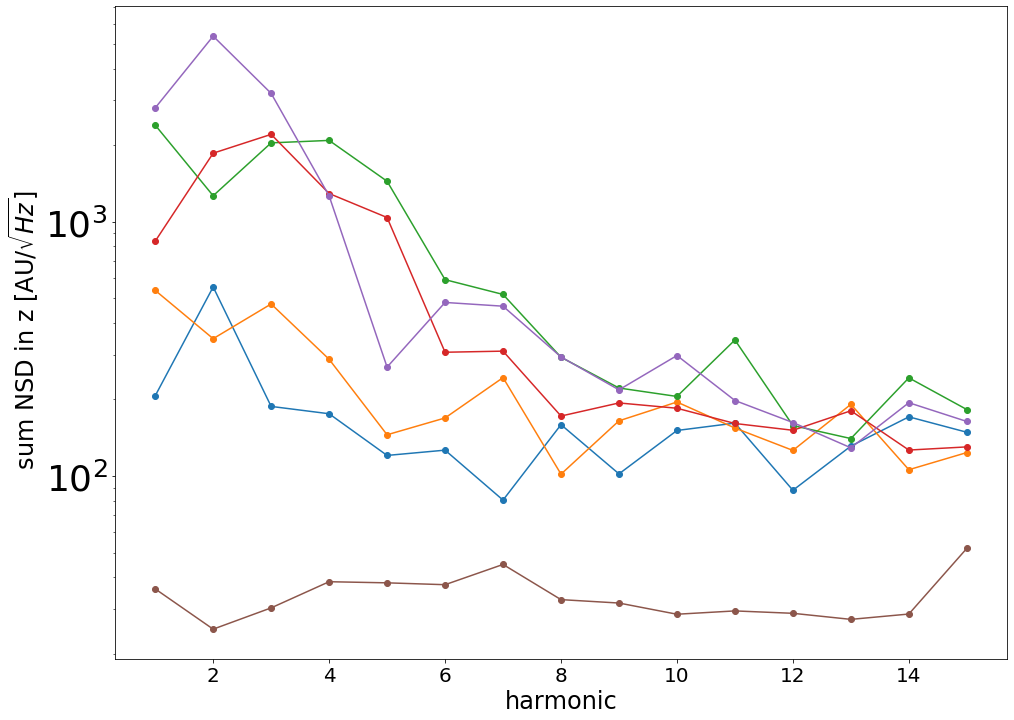

[array([10333.09295024, 27688.00824146,  9388.27260621,  8784.29781958,
         6022.85569145,  6317.97538905,  4019.365453  ,  7957.81297804,
         5096.65710974,  7550.0146392 ,  8070.33029411,  4393.05058774,
         6554.33676563,  8541.3723464 ,  7429.62114865]),
 array([26845.29345185, 17336.45293554, 23737.4294934 , 14386.79634704,
         7261.41427606,  8456.06042734, 12184.11224879,  5083.93267242,
         8239.96831135,  9770.00466785,  7719.40119524,  6302.52465542,
         9567.0279369 ,  5291.94088208,  6181.76798377]),
 array([119899.10125041,  63236.0586214 , 102088.36475895, 104378.17872657,
         72123.50647595,  29583.03089061,  25875.14625525,  14652.36299272,
         11090.40447934,  10274.094271  ,  17131.13189763,   7895.80472028,
          7016.86693225,  12157.91242276,   9125.91435993]),
 array([ 41893.88065653,  92977.33350868, 110256.15899477,  64531.21386159,
         51927.83177101,  15331.30789233,  15485.63131783,   8603.91687292,
          9

In [18]:
df_sublist = df_list2[0:5]
df_sublist.append(df_list2[5])

#df_sublist = df_list[3:7]
#df_sublist.append(df_list[6][0:40])
#df_sublist.append(df_list[6][40:100])
norm_factor = 1
axis = "z"
#if(axis=="x"):norm_factor=norm_x
#if(axis=="z"):norm_factor=norm_z    
distance = 361
output_file= "Results/No_Wall_20200128/%sforce_shield_influence_%d.png" %(axis,distance)
save_file = False
plot_basic_harmonic_sum(df_sublist,axis=axis,norm_factor=norm_factor,no_harmonics=15,label="Z position in um",var_of_interest="attractor_position_z",output_file=output_file,legend=False,save_file=save_file)
